# Road Safety Portfolio Project

The following project uses the workflow presented by the book [Data Science Solutions](https://startupsci.com/). This workflow can be split broadly into seven stages:

1. Set the problem definition / the question you are trying to answer.
2. Acquire the training and testing data.
3. Wrangle, prepare, cleanse the data.
4. Analyze, identify patterns, and explore the data.
5. Model, predict, solve the problem.
6. Visualise, report, present the problem solving steps and final solution.
7. Present the overview of the solution to be useful to non-technical people.

These steps are not concrete and the steps can be merged or even dropped if not necessary.

## Problem definition

JStone Insurance are a large insurer based in the UK, operating principally in Vehicle Insurance (both personal Car and business including vans and HGVs) and Car Breakdown with a disproportionately large proportion of customers and claims located in London. 
JStone Insurance have identified three areas where they would like to make improvements using Data Science:
1.	Enhanced risk pricing
2.	Enhanced breakdown response
3.	Stronger customer relationship

1) **Enhanced risk pricing**
We are interested in improving our pricing of car insurance policies in order to identify who is most likely to cause high cost claims as a result of an accident in the Greater London Area.

We would like to improve risk pricing by identifying accidents resulting in most serious/fatal injuries, multiple vehicle accidents injuries to pedestrians (3rd party liability).

This could be done through providing different pricing factors for driver demographics, vehicle information vehicle usage

2) **Enhanced breakdown response**
We operate a breakdown service for our customers. We are looking to understand where our breakdown patrols should be located at different times during the day.

Understand how to deploy breakdown resources: which locations should we have our breakdown depot / deploy our patrol vehicles dynamically based on where accidents are most likely to occur



3) **Stronger customer relationship**
As part of building the relationship with our customers and to increase brand loyalty, we would like to provide our customers with tailored communications warning them to be careful and provide tips to reduce chances of having an accident.

Understand how to send tailored communications to people who are most at risk of having an accident given: who they are, where they are, weather conditions, their vehicle and how they use it.

Looking to understand: who to contact, when to contact, messaging (driving tips - i.e. be especially careful when joining a motorway, x% of accidents happen) 

## Acquire the training and testing data

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
os.chdir("../data/initial_download/")

In [5]:
accidents = pd.read_csv("Accidents_2015.csv", dtype={'Accident_Index': str})
casualties = pd.read_csv("Casualties_2015.csv", dtype={'Accident_Index': str})
vehicles = pd.read_csv("Vehicles_2015.csv", dtype={'Accident_Index': str})

Initially, I did not set the data type of the Accident_Index (which is the unique key between all datasets) to be a string, meaning that the merges did not work as desired.

## Wrangle, prepare, cleanse the data

### Descriptive analytics

The first step is to understand the meanings of the datasets. From here we can explore them and see how the information can be joined to create one coherent dataset.

In [6]:
accidents.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,201501BS70001,525130.0,180050.0,-0.198465,51.505538,1,3,1,1,12/01/2015,...,0,0,4,1,1,0,0,1,1,E01002825
1,201501BS70002,526530.0,178560.0,-0.178838,51.491836,1,3,1,1,12/01/2015,...,0,0,1,1,1,0,0,1,1,E01002820
2,201501BS70004,524610.0,181080.0,-0.205590,51.514910,1,3,1,1,12/01/2015,...,0,1,4,2,2,0,0,1,1,E01002833
3,201501BS70005,524420.0,181080.0,-0.208327,51.514952,1,3,1,1,13/01/2015,...,0,0,1,1,2,0,0,1,2,E01002874
4,201501BS70008,524630.0,179040.0,-0.206022,51.496572,1,2,2,1,09/01/2015,...,0,5,1,2,2,0,0,1,2,E01002814


In [7]:
casualties.head()

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,201597UA71710,2,1,1,2,75,10,3,0,0,0,0,0,9,3,-1
1,201597UA71810,2,1,2,2,63,9,2,0,0,0,4,0,11,3,-1
2,201597UA71810,2,2,2,2,75,10,2,0,0,0,4,0,11,1,-1
3,201597UA71810,2,3,2,1,78,11,2,0,0,0,4,0,11,1,-1
4,201597UA71810,2,4,2,1,67,10,2,0,0,0,4,0,11,1,-1


In [8]:
vehicles.head()

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,201506E098757,2,9,0,18,0,8,0,0,0,...,6,1,45,7,1794,1,11,-1,1,-1
1,201506E098766,1,9,0,9,0,8,0,0,0,...,6,2,25,5,1582,2,1,-1,-1,-1
2,201506E098766,2,9,0,18,0,8,0,0,0,...,6,1,51,8,-1,-1,-1,-1,1,-1
3,201506E098777,1,20,0,4,0,0,0,0,0,...,1,1,50,8,4462,2,1,-1,1,-1
4,201506E098780,1,9,0,15,0,1,0,0,0,...,6,1,27,6,1598,2,-1,-1,1,-1


In [9]:
print accidents.shape
print casualties.shape
print vehicles.shape

(140056, 32)
(186189, 16)
(257845, 23)


In [10]:
print accidents['Accident_Index'].nunique()
print casualties['Accident_Index'].nunique()
print vehicles['Accident_Index'].nunique()

140056
140056
140056


One row in the 'accidents' table represents an accident.<br/>
One row in the 'casualties' table is for one person in an accident.<br/>
One row in the 'vehicles' table is for one vehicle in an accident.

More vehicles than casualties means that there must be vehicles with no casualties in the accident (eg A_I = 201506E098766)

Vehicles and Casualties can be linked by both the Accident_Index and the Vehicle_Reference to see who was in which vehicle in the accident. Further details of the crash can be found in the accidents table by linking with the unique Accident_Index variable. 

### Join the datasets to form one coherent dataset

In [11]:
cas_and_veh = pd.merge(left=casualties, right=vehicles,
                      on=['Accident_Index', 'Vehicle_Reference'],
                     how='outer', copy=False)
cas_and_veh.shape

(285509, 37)

16 columns from casualties data + 23 columns from vehicles data - 2 duplicate columns = 37 columns

In [12]:
accidents.columns

Index([u'Accident_Index', u'Location_Easting_OSGR', u'Location_Northing_OSGR',
       u'Longitude', u'Latitude', u'Police_Force', u'Accident_Severity',
       u'Number_of_Vehicles', u'Number_of_Casualties', u'Date', u'Day_of_Week',
       u'Time', u'Local_Authority_(District)', u'Local_Authority_(Highway)',
       u'1st_Road_Class', u'1st_Road_Number', u'Road_Type', u'Speed_limit',
       u'Junction_Detail', u'Junction_Control', u'2nd_Road_Class',
       u'2nd_Road_Number', u'Pedestrian_Crossing-Human_Control',
       u'Pedestrian_Crossing-Physical_Facilities', u'Light_Conditions',
       u'Weather_Conditions', u'Road_Surface_Conditions',
       u'Special_Conditions_at_Site', u'Carriageway_Hazards',
       u'Urban_or_Rural_Area', u'Did_Police_Officer_Attend_Scene_of_Accident',
       u'LSOA_of_Accident_Location'],
      dtype='object')

In [13]:
cas_and_veh.columns

Index([u'Accident_Index', u'Vehicle_Reference', u'Casualty_Reference',
       u'Casualty_Class', u'Sex_of_Casualty', u'Age_of_Casualty',
       u'Age_Band_of_Casualty', u'Casualty_Severity', u'Pedestrian_Location',
       u'Pedestrian_Movement', u'Car_Passenger', u'Bus_or_Coach_Passenger',
       u'Pedestrian_Road_Maintenance_Worker', u'Casualty_Type',
       u'Casualty_Home_Area_Type', u'Casualty_IMD_Decile', u'Vehicle_Type',
       u'Towing_and_Articulation', u'Vehicle_Manoeuvre',
       u'Vehicle_Location-Restricted_Lane', u'Junction_Location',
       u'Skidding_and_Overturning', u'Hit_Object_in_Carriageway',
       u'Vehicle_Leaving_Carriageway', u'Hit_Object_off_Carriageway',
       u'1st_Point_of_Impact', u'Was_Vehicle_Left_Hand_Drive?',
       u'Journey_Purpose_of_Driver', u'Sex_of_Driver', u'Age_of_Driver',
       u'Age_Band_of_Driver', u'Engine_Capacity_(CC)', u'Propulsion_Code',
       u'Age_of_Vehicle', u'Driver_IMD_Decile', u'Driver_Home_Area_Type',
       u'Vehicle_IMD_Dec

In [23]:
all_merged = pd.merge(left=accidents, right=cas_and_veh, how='outer',
             on='Accident_Index', copy=False)

In [15]:
all_merged['Accident_Index'].nunique()

140056

In [22]:
all_merged.columns

Index([u'Accident_Index', u'Location_Easting_OSGR', u'Location_Northing_OSGR',
       u'Longitude', u'Latitude', u'Police_Force', u'Accident_Severity',
       u'Number_of_Vehicles', u'Number_of_Casualties', u'Date', u'Day_of_Week',
       u'Time', u'Local_Authority_(District)', u'Local_Authority_(Highway)',
       u'1st_Road_Class', u'1st_Road_Number', u'Road_Type', u'Speed_limit',
       u'Junction_Detail', u'Junction_Control', u'2nd_Road_Class',
       u'2nd_Road_Number', u'Pedestrian_Crossing-Human_Control',
       u'Pedestrian_Crossing-Physical_Facilities', u'Light_Conditions',
       u'Weather_Conditions', u'Road_Surface_Conditions',
       u'Special_Conditions_at_Site', u'Carriageway_Hazards',
       u'Urban_or_Rural_Area', u'Did_Police_Officer_Attend_Scene_of_Accident',
       u'LSOA_of_Accident_Location', u'Vehicle_Reference',
       u'Casualty_Reference', u'Casualty_Class', u'Sex_of_Casualty',
       u'Age_of_Casualty', u'Age_Band_of_Casualty', u'Casualty_Severity',
       u'P

Now, each record in df represents a 'player' in a crash (either a person and their vehicle details, a person who was not associated with a vehicle in the accident, or a vehicle whose driver/passenger was not injured)

In [16]:
all_merged.to_csv('../../data_transformed/20170217_merged_dataset.csv')

## Analyse, identify patterns, explore the data

In [17]:
df = pd.read_csv('../../data_transformed/20170217_merged_dataset.csv',
                 dtype={'Accident_Index':str})

C:\Users\IBM_ADMIN\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [25]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.columns

Index([u'Accident_Index', u'Location_Easting_OSGR', u'Location_Northing_OSGR',
       u'Longitude', u'Latitude', u'Police_Force', u'Accident_Severity',
       u'Number_of_Vehicles', u'Number_of_Casualties', u'Date', u'Day_of_Week',
       u'Time', u'Local_Authority_(District)', u'Local_Authority_(Highway)',
       u'1st_Road_Class', u'1st_Road_Number', u'Road_Type', u'Speed_limit',
       u'Junction_Detail', u'Junction_Control', u'2nd_Road_Class',
       u'2nd_Road_Number', u'Pedestrian_Crossing-Human_Control',
       u'Pedestrian_Crossing-Physical_Facilities', u'Light_Conditions',
       u'Weather_Conditions', u'Road_Surface_Conditions',
       u'Special_Conditions_at_Site', u'Carriageway_Hazards',
       u'Urban_or_Rural_Area', u'Did_Police_Officer_Attend_Scene_of_Accident',
       u'LSOA_of_Accident_Location', u'Vehicle_Reference',
       u'Casualty_Reference', u'Casualty_Class', u'Sex_of_Casualty',
       u'Age_of_Casualty', u'Age_Band_of_Casualty', u'Casualty_Severity',
       u'P

Let's start with the first problem posed by JStone Insurance - enhanced risk pricing. We want to identify the most serious accidents.

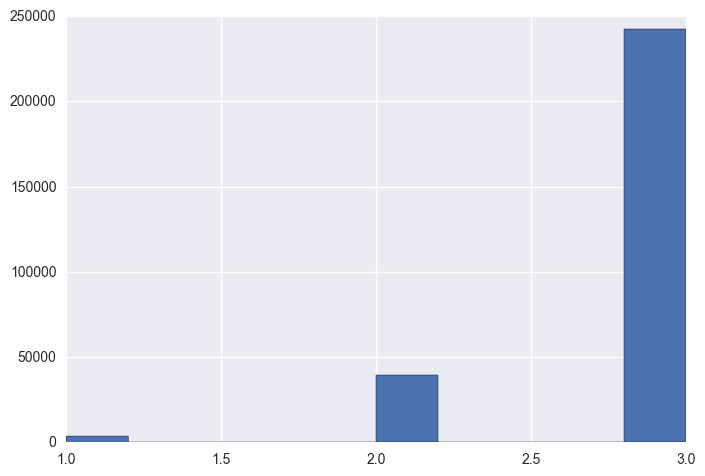

In [19]:
df['Accident_Severity'].hist()
# 1 - Fatal, 2 - Serious, 3 - Slight

Clearly, most accidents are 'slight'. Where the accident severity currently has three categories, we want a target variable that is either 1 or 0. Therefore, for our initial purposes, we shall classify accidents as a worth identifying as those that are either fatal or serious (bad accidents), with the slight accidents being not worth identifying (not bad accidents).

In [27]:
df['Bad_Accident'] = np.where(df['Accident_Severity'] < 3, 1, 0)
df[['Accident_Severity', 'Bad_Accident']].head()

,Accident_Severity,Bad_Accident
0,3,0
1,3,0
2,3,0
3,3,0
4,2,1


In [28]:
df['Bad_Accident'].mean()

0.15017039743055385

15% of the accidents are 'bad' accidents. Our job now will be to identify what these accidents have in common.

In [37]:
# Create crosstables for each of the categorical variables with the target variable.
# Have a look for which values of these categorical variables has a higher proportion of bad accidents.
# Any variable & value combination that produces more than 15% bad accidents should be investigated.

categorical_variables = [u'Police_Force',
       'Day_of_Week', 'Local_Authority_(Highway)', '1st_Road_Class',
       'Road_Type', 'Speed_limit', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Casualty_Class', 'Sex_of_Casualty',
       'Age_Band_of_Casualty', u'Casualty_Severity',
       'Casualty_Type', 'Vehicle_Type',
       'Journey_Purpose_of_Driver', 'Sex_of_Driver', 
       'Age_Band_of_Driver', u'Propulsion_Code']

# Create a dictionary for the variable & value, and the proportion of bad accidents.
prop_dict={}
for var in categorical_variables:
    
    ct = pd.crosstab(index=df['Bad_Accident'], columns=df[var], normalize='columns')
    
    for x in df[var].unique():
        prop = ct.iloc[1][x]
        
        key = str(var) + " = " + str(x)
        prop_dict[key] = prop
        
#Remove any null proportions
for keyvalue in prop_dict.items():
    if type(keyvalue[1]) is not np.float64:
        del prop_dict[keyvalue[0]]

#Sort based on the proportion        
sorted(prop_dict.items(), key=lambda x:x[1], reverse=True)

[('Casualty_Severity = 2.0', 1.0),
 ('Casualty_Severity = 1.0', 1.0),
 ('Propulsion_Code = 4', 1.0),
 ('Vehicle_Type = 23', 0.55555555555555558),
 ('Casualty_Type = 23.0', 0.55555555555555558),
 ('Local_Authority_(Highway) = S12000020', 0.42553191489361702),
 ('Local_Authority_(Highway) = S12000034', 0.41590214067278286),
 ('Casualty_Type = 5.0', 0.3894599681482554),
 ('Vehicle_Type = 5', 0.38253498385360601),
 ('Police_Force = 92', 0.37988362427265171),
 ('Casualty_Type = 17.0', 0.36046511627906974),
 ('Casualty_Type = 97.0', 0.33333333333333331),
 ('Local_Authority_(Highway) = S12000033', 0.30637254901960786),
 ('Casualty_Type = 4.0', 0.30282375851996107),
 ('Casualty_Type = 90.0', 0.29999999999999999),
 ('Vehicle_Type = 4', 0.2988606485539001),
 ('Casualty_Type = 21.0', 0.29797979797979796),
 ('Local_Authority_(Highway) = E06000017', 0.29608938547486036),
 ('Vehicle_Type = 97', 0.29537366548042704),
 ('Age_Band_of_Casualty = 11.0', 0.29076125052572549),
 ('Local_Authority_(Highway) 

Ignoring the original casualty severity variable, propulsion code and vehicle type are worth investigating more.

In [38]:
pd.crosstab(index=df['Bad_Accident'], columns=df['Vehicle_Type'], normalize='columns')

Propulsion_Code,-1,1,2,3,4,5,6,7,8,9,10,12
Bad_Accident,,,,,,,,,,,,
0,0.841546,0.845596,0.861002,0.867188,0.0,0.780488,0.912281,0.905263,0.920243,1.0,1.0,0.872727
1,0.158454,0.154404,0.138998,0.132812,1.0,0.219512,0.087719,0.094737,0.079757,0.0,0.0,0.127273


|**code** |	**label**
|----------------------------------|
|1	      |Pedal cycle
|2	      |Motorcycle 50cc and under
|3	      |Motorcycle 125cc and under
|4	      |Motorcycle over 125cc and up to 500cc
|5	      |Motorcycle over 500cc
|8	      |Taxi/Private hire car
|9	      |Car
|10	      |Minibus (8 - 16 passenger seats)
|11	      |Bus or coach (17 or more pass seats)
|16	      |Ridden horse
|17	      |Agricultural vehicle
|18	      |Tram
|19	      |Van / Goods 3.5 tonnes mgw or under
|20	      |Goods over 3.5t. and under 7.5t
|21	      |Goods 7.5 tonnes mgw and over
|22	      |Mobility scooter
|23	      |Electric motorcycle
|90	      |Other vehicle
|97	      |Motorcycle - unknown cc
|98	      |Goods vehicle - unknown weight
|-1	      |Data missing or out of range


For a bit of clarity, some of the labels can be combined (motorcycles, rare, etc)

In [44]:
df['Vehicle_Type'].value_counts()

 9     205985
 1      19611
 19     14594
 3       9512
 5       7432
 11      6951
 8       6300
 21      4816
 2       2284
 4       2282
 20      1768
 90      1405
 10       730
 98       634
 17       509
 97       281
 22       222
 16       108
-1         58
 18        18
 23         9
Name: Vehicle_Type, dtype: int64

In [39]:
pd.crosstab(index=df['Bad_Accident'], columns=df['Propulsion_Code'], normalize='columns')

Propulsion_Code,-1,1,2,3,4,5,6,7,8,9,10,12
Bad_Accident,,,,,,,,,,,,
0,0.841546,0.845596,0.861002,0.867188,0.0,0.780488,0.912281,0.905263,0.920243,1.0,1.0,0.872727
1,0.158454,0.154404,0.138998,0.132812,1.0,0.219512,0.087719,0.094737,0.079757,0.0,0.0,0.127273


In [69]:
def group_vehicle_types(x):
    if x == 2 or x == 3 or x == 4 or x == 5 or x == 23 or x == 97:
        return 'Motorcycle'
    elif x == 19 or x == 20 or x == 21 or x == 98:
        return 'Van/HGV'
    elif x == 9:
        return 'Car'
    elif x == 1:
        return 'Pedal Cycle'
    elif x == 11:
        return 'Bus/Coach'
    elif x == 8:
        return 'Taxi/Private Hire'
    elif x == 90:
        return 'Other'
    elif x == 10:
        return 'Minibus'
    else:
        return str(x)

df['Vehicle_Type_Grouped'] = df['Vehicle_Type'].apply(group_vehicle_types)
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile,_merge,Bad_Accident,Vehicle_Type_Grouped
0,201501BS70001,525130.0,180050.0,-0.198465,51.505538,1,3,1,1,12/01/2015,...,-1,2143,2,4,-1,-1,-1,both,0,Van/HGV
1,201501BS70002,526530.0,178560.0,-0.178838,51.491836,1,3,1,1,12/01/2015,...,-1,1600,1,3,-1,-1,-1,both,0,Car
2,201501BS70004,524610.0,181080.0,-0.205590,51.514910,1,3,1,1,12/01/2015,...,6,1686,2,10,-1,1,-1,both,0,Car
3,201501BS70005,524420.0,181080.0,-0.208327,51.514952,1,3,1,1,13/01/2015,...,-1,-1,-1,-1,-1,-1,-1,both,0,Car
4,201501BS70008,524630.0,179040.0,-0.206022,51.496572,1,2,2,1,09/01/2015,...,8,-1,-1,-1,-1,1,-1,both,1,Pedal Cycle


In [121]:
veh_ct = pd.crosstab(index=df['Vehicle_Type_Grouped'], columns=df['Bad_Accident'], normalize='index')
veh_ct

Bad_Accident,0,1
Vehicle_Type_Grouped,,
-1,0.827586,0.172414
16,0.833333,0.166667
17,0.724951,0.275049
18,0.888889,0.111111
22,0.752252,0.247748
Bus/Coach,0.844914,0.155086
Car,0.867820,0.132180
Minibus,0.776712,0.223288
Motorcycle,0.721697,0.278303


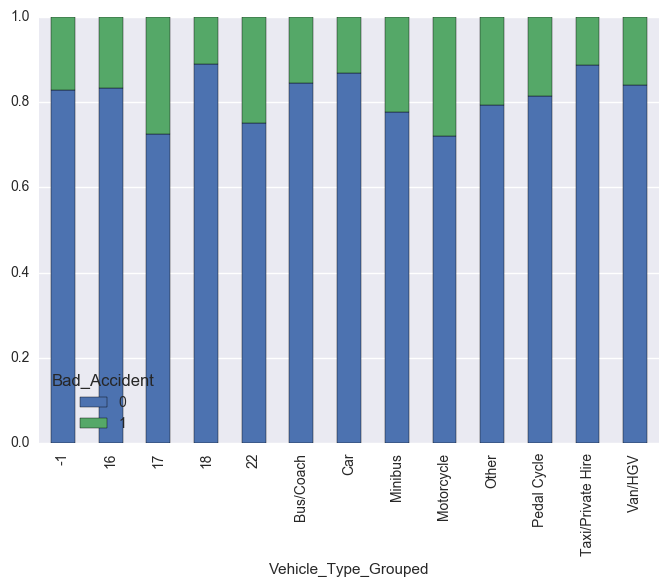

In [126]:
veh_ct.plot.bar(stacked=True)

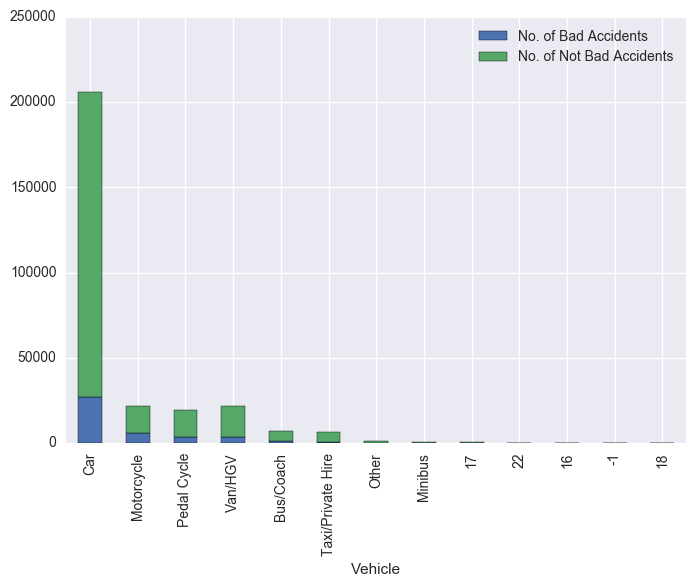

In [119]:
sub_df1 = pd.DataFrame(df[df['Bad_Accident']==1]['Vehicle_Type_Grouped'].value_counts())
sub_df1.reset_index(inplace=True)
sub_df1 = sub_df1.rename(columns={'Vehicle_Type_Grouped':'No. of Bad Accidents', 'index':'Vehicle'})

sub_df0 = pd.DataFrame(df[df['Bad_Accident']==0]['Vehicle_Type_Grouped'].value_counts())
sub_df0.reset_index(inplace=True)
sub_df0 = sub_df0.rename(columns={'Vehicle_Type_Grouped':'No. of Not Bad Accidents', 'index':'Vehicle'})

sub_df = pd.merge(sub_df1, sub_df0, on='Vehicle', how='outer')
sub_df.set_index('Vehicle', inplace=True)

sub_df.plot.bar(stacked=True)